In [1]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import os
import csv
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
root_dir='../input/taiwanese-food-101/tw_food_101/tw_food_101'
train_dir = root_dir + '/train'
test_dir = root_dir + '/test'

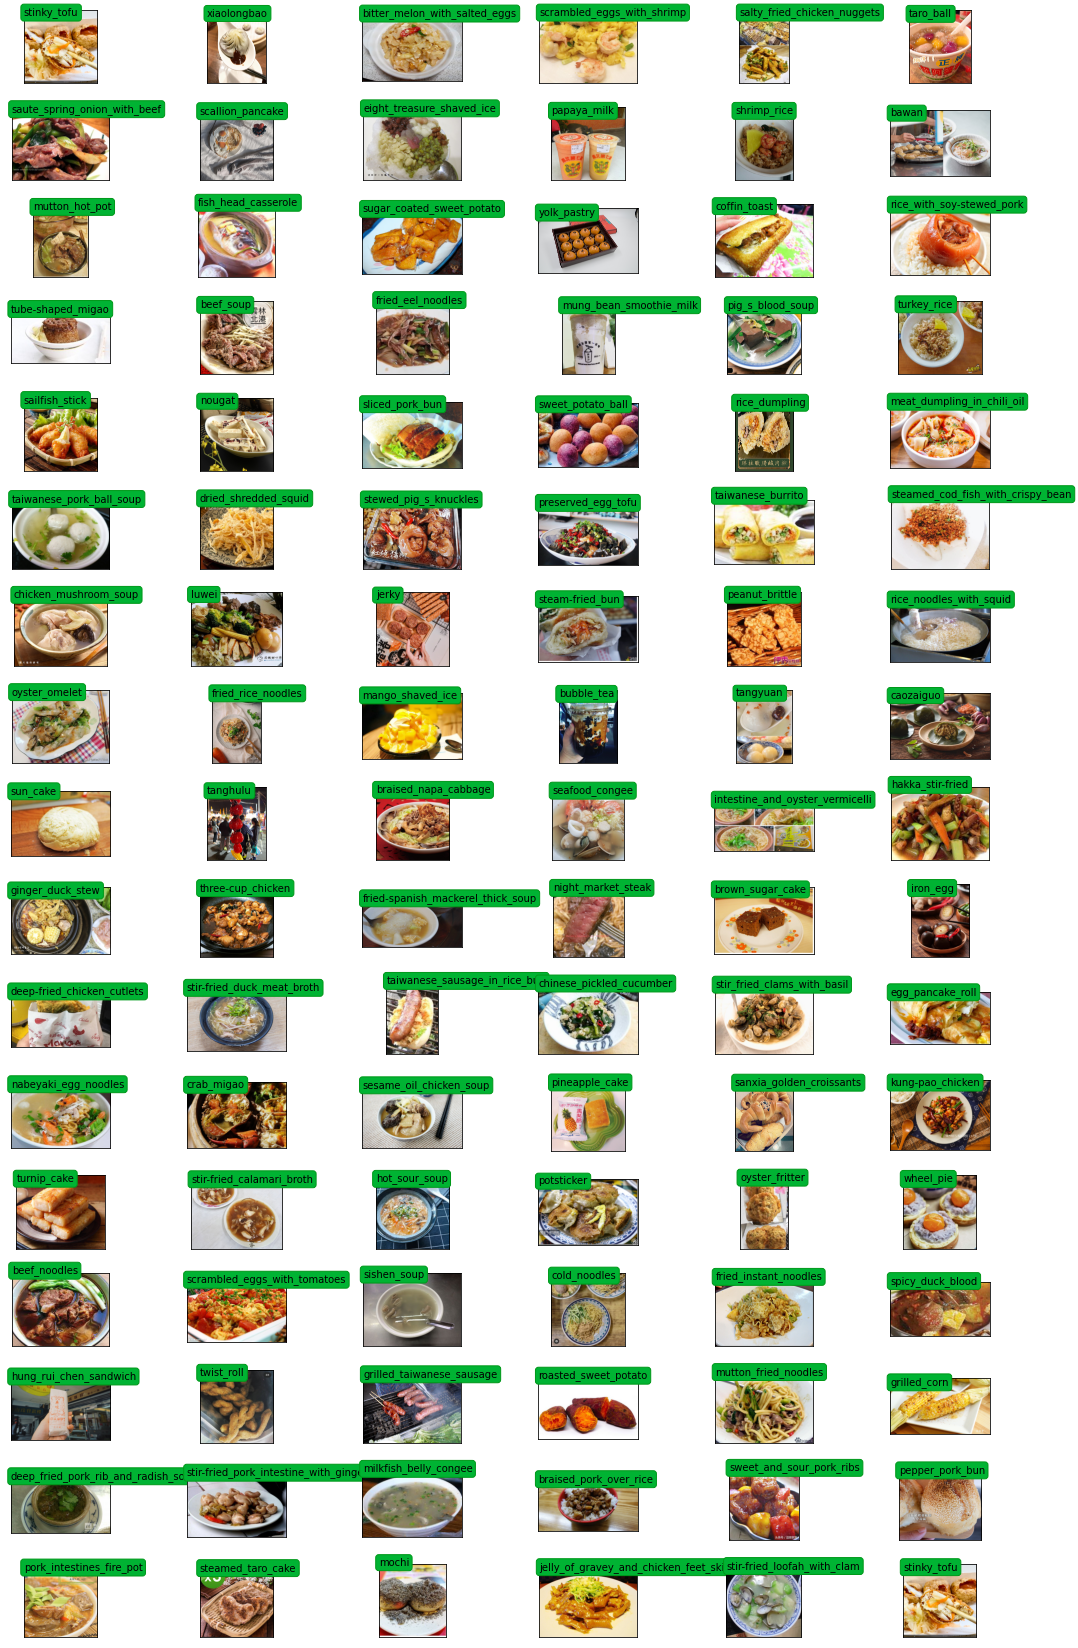

In [3]:
%matplotlib inline
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
food_dirs = os.listdir(train_dir)
for i in range(rows):
    for j in range(cols):
        food_dir = food_dirs[(i*cols + j)%101]
        all_files = os.listdir(os.path.join(train_dir, food_dir))
        img = plt.imread(os.path.join(train_dir, food_dir, all_files[3]))
        ax[i][j].imshow(img)
        ax[i][j].text(0, -20, food_dir, size=10, rotation=0, ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=(0, .6, .1), fc=(0, .7, .2)))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(221, 221), 
    color_mode = "rgb",
    batch_size= 32,
    class_mode='categorical',
    shuffle = True)

Found 20372 images belonging to 101 classes.


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(221, 221), 
    color_mode = "rgb",
)

Found 20372 images belonging to 101 classes.


In [7]:
#base_model = keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet', input_shape=(221, 221, 3))
base_model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(221, 221, 3))
#base_model = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
#base_model = keras.applications.resnet.ResNet50(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
#base_model = keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

2022-10-17 15:53:41.766128: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 15:53:41.855906: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 15:53:41.856673: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 15:53:41.858603: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 0s 0us/step


In [8]:
x = base_model.output
x = Flatten()(x)
x = Dense(2048, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(.4)(x)

predictions = Dense(101, activation='softmax')(x)

model = Model(base_model.input, predictions)

#model.summary()

In [9]:
model.compile(optimizer='Adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [10]:
history = model.fit_generator(
      train_generator,
      epochs=10
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-10-17 15:53:48.313784: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-10-17 15:53:56.097184: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


107/637 [====>.........................] - ETA: 8:07 - loss: 5.3129 - accuracy: 0.0114

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


195/637 [========>.....................] - ETA: 6:40 - loss: 4.9984 - accuracy: 0.0114

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


637/637 [==============================] - 593s 910ms/step - loss: 4.6439 - accuracy: 0.0198
Epoch 2/10
637/637 [==============================] - 491s 771ms/step - loss: 4.2418 - accuracy: 0.0366
Epoch 3/10
637/637 [==============================] - 489s 768ms/step - loss: 3.9775 - accuracy: 0.0592
Epoch 4/10
637/637 [==============================] - 487s 765ms/step - loss: 3.8228 - accuracy: 0.0793
Epoch 5/10
637/637 [==============================] - 489s 768ms/step - loss: 3.5914 - accuracy: 0.1069
Epoch 6/10
637/637 [==============================] - 490s 769ms/step - loss: 3.7023 - accuracy: 0.1007
Epoch 7/10
637/637 [==============================] - 489s 766ms/step - loss: 3.4257 - accuracy: 0.1388
Epoch 8/10
637/637 [==============================] - 488s 766ms/step - loss: 3.1561 - accuracy: 0.1840
Epoch 9/10
637/637 [==============================] - 490s 768ms/step - loss: 3.0014 - accuracy: 0.2175
Epoch 10/10
637/637 [==============================] - 491s 771ms/step - lo

In [11]:
# Create {ID, filename} dictionary {'1269': '1269.jpg', '3863': '3863.jpg',.....}
test_dict = {}
for root, dirs, files in os.walk(root_dir + '/test'):
    for filename in files:
        test_id, file_ext = os.path.splitext(filename)
        test_dict[test_id] = filename

In [12]:
from PIL import Image
import numpy as np
from skimage import transform
def load_img(filename, target_w=150, target_h=150):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (target_w, target_h, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image


In [13]:
# Read images in order and make predictions
results = []
for i in range(len(test_dict)):
    img = load_img(root_dir + '/test/' + test_dict[str(i)], 221, 221)
    ret = model.predict(img)
    results.append(np.argmax(ret))

In [14]:
# Print results in CSV format and upload to Kaggle
with open('pred_results.csv', 'w') as f:
    f.write('Id,Category\n')
    for i in range(len(results)):
        f.write(str(i) + ',' + str(results[i]) + '\n')

In [15]:
# Download your results!
from IPython.display import FileLink
FileLink('pred_results.csv')

/kaggle/working/pred_results.csv